In [1]:
import networkx as nx
import numpy as np

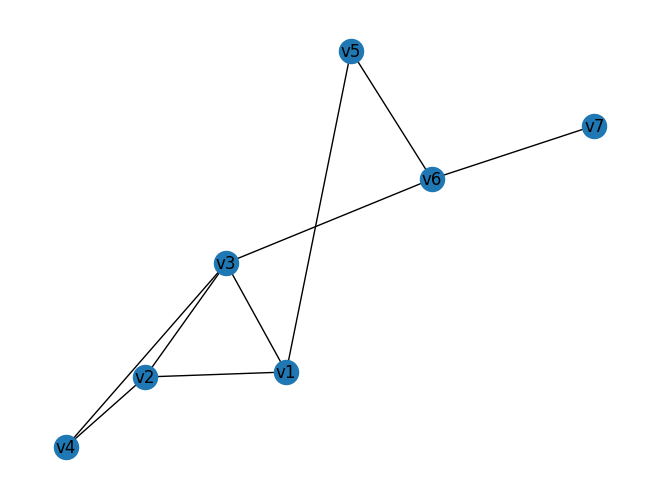

In [2]:
# エッジリストの作成
edge_list = [
    ("v1", "v2"),
    ("v1", "v3"),
    ("v1", "v5"),
    ("v2", "v3"),
    ("v2", "v4"),
    ("v3", "v4"),
    ("v3", "v6"),
    ("v5", "v6"),
    ("v6", "v7"),
]

# グラフの作成
G = nx.Graph(edge_list)
nx.draw(G, with_labels=True)

In [3]:
# ノード一覧
print(G.nodes())

['v1', 'v2', 'v3', 'v5', 'v4', 'v6', 'v7']


In [4]:
# 付属情報込みで
print(G.nodes(data=True))

[('v1', {}), ('v2', {}), ('v3', {}), ('v5', {}), ('v4', {}), ('v6', {}), ('v7', {})]


In [5]:
# エッジ一覧
print(G.edges())
print(G.edges(data=True))

[('v1', 'v2'), ('v1', 'v3'), ('v1', 'v5'), ('v2', 'v3'), ('v2', 'v4'), ('v3', 'v4'), ('v3', 'v6'), ('v5', 'v6'), ('v6', 'v7')]
[('v1', 'v2', {}), ('v1', 'v3', {}), ('v1', 'v5', {}), ('v2', 'v3', {}), ('v2', 'v4', {}), ('v3', 'v4', {}), ('v3', 'v6', {}), ('v5', 'v6', {}), ('v6', 'v7', {})]


In [6]:
# ラベル付けなおし
mapping = {
    "v1": "a",
    "v2": "b",
    "v3": "c",
}

H = nx.relabel_nodes(G, mapping)
print(H.nodes())

['a', 'b', 'c', 'v5', 'v4', 'v6', 'v7']


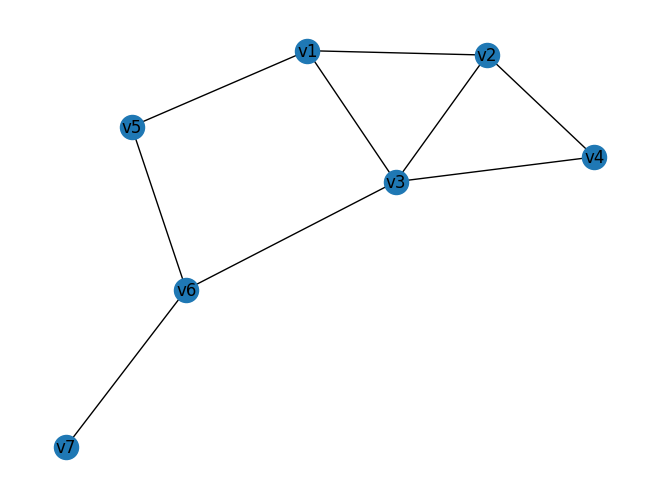

In [7]:
# 隣接リストの作成
adj_list = {
    "v1": ["v2", "v3", "v5"],
    "v2": ["v1", "v3", "v4"],
    "v3": ["v1", "v2", "v4", "v6"],
    "v4": ["v2", "v3"],
    "v5": ["v1", "v6"],
    "v6": ["v3", "v5", "v7"],
    "v7": ["v6"],
}

# 隣接リストからグラフの作成
G2 = nx.Graph(adj_list)
nx.draw(G2, with_labels=True)

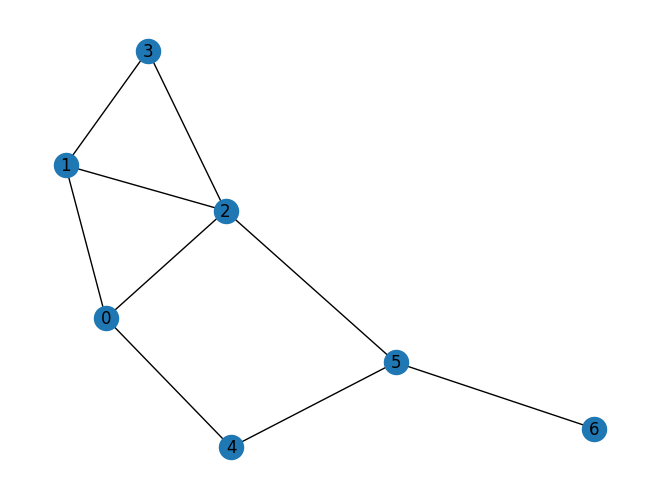

In [8]:
# 隣接行列からグラフの作成
adj_matrix = np.array([
    [0, 1, 1, 0, 1, 0, 0],
    [1, 0, 1, 1, 0, 0, 0],
    [1, 1, 0, 1, 0, 1, 0],
    [0, 1, 1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 1, 0],
])

G = nx.from_numpy_array(adj_matrix)
nx.draw(G, with_labels=True)

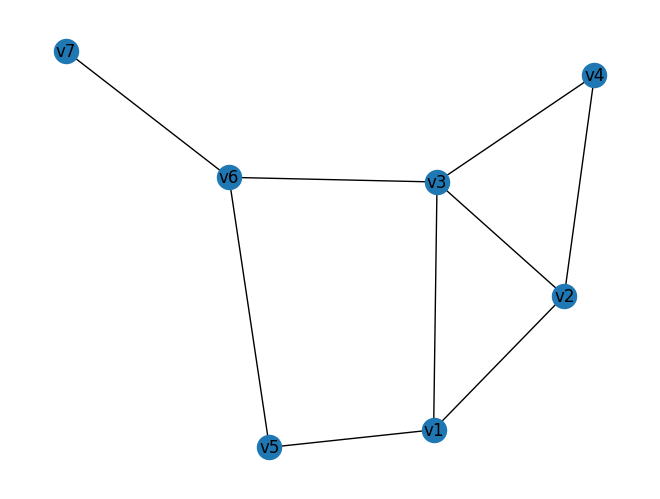

In [9]:
# 表（pandas DataFrame）からグラフの作成
import pandas as pd
edge_df = pd.DataFrame({
    "source": ["v1", "v1", "v1", "v2", "v2", "v3", "v3", "v5", "v6"],
    "target": ["v2", "v3", "v5", "v3", "v4", "v4", "v6", "v6", "v7"],
})
G_df = nx.from_pandas_edgelist(edge_df, source="source", target="target")
nx.draw(G_df, with_labels=True)

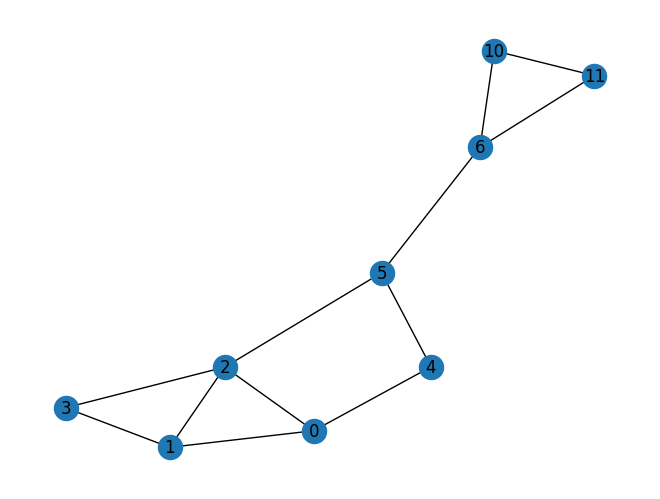

In [10]:
# ノード，エッジの追加

newG = G.copy()

# ノードの追加
newG.add_node(10)

# エッジの追加
newG.add_edge(10, 11)

# 複数エッジの追加
newG.add_edges_from([(11, 6), (10, 6)])
nx.draw(newG, with_labels=True)

In [11]:
# 汎用データ型に戻す

# 隣接行列（スパース行列）
sparse_adj_matrix = nx.adjacency_matrix(G)
print(sparse_adj_matrix)

<Compressed Sparse Row sparse array of dtype 'int64'
	with 18 stored elements and shape (7, 7)>
  Coords	Values
  (0, 1)	1
  (0, 2)	1
  (0, 4)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1
  (2, 3)	1
  (2, 5)	1
  (3, 1)	1
  (3, 2)	1
  (4, 0)	1
  (4, 5)	1
  (5, 2)	1
  (5, 4)	1
  (5, 6)	1
  (6, 5)	1


In [12]:
# 隣接行列（dense行列）
dense_adj_matrix = nx.to_numpy_array(G)
print(dense_adj_matrix)

[[0. 1. 1. 0. 1. 0. 0.]
 [1. 0. 1. 1. 0. 0. 0.]
 [1. 1. 0. 1. 0. 1. 0.]
 [0. 1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0.]]


In [13]:
# エッジリスト
edge_list = nx.edges(G)
print(edge_list)

[(0, 1), (0, 2), (0, 4), (1, 2), (1, 3), (2, 3), (2, 5), (4, 5), (5, 6)]


In [14]:
# 隣接リスト
adj_list = nx.to_dict_of_lists(G)
print(adj_list)

{0: [1, 2, 4], 1: [0, 2, 3], 2: [0, 1, 3, 5], 3: [1, 2], 4: [0, 5], 5: [2, 4, 6], 6: [5]}


In [15]:
# 属性追加
newG = G.copy()

newG.nodes[0]["name"] = "sakana"
newG.nodes[0]["signal"] = 0.76

newG.add_nodes_from(
    [
        (1, {"name": "v2", "signal": 1.4}),
        (2, {"name": "v3", "signal": 0.23}),
    ]
)

newG.edges[0, 4]["weight"] = 3.5
newG.edges[0, 2]["name"] = "fuga"

print(newG.nodes(data=True))
print(newG.edges(data=True))

[(0, {'name': 'sakana', 'signal': 0.76}), (1, {'name': 'v2', 'signal': 1.4}), (2, {'name': 'v3', 'signal': 0.23}), (3, {}), (4, {}), (5, {}), (6, {})]
[(0, 1, {'weight': 1}), (0, 2, {'weight': 1, 'name': 'fuga'}), (0, 4, {'weight': 3.5}), (1, 2, {'weight': 1}), (1, 3, {'weight': 1}), (2, 3, {'weight': 1}), (2, 5, {'weight': 1}), (4, 5, {'weight': 1}), (5, 6, {'weight': 1})]


In [18]:
# 属性名から情報取得
print(nx.get_node_attributes(newG, "name"))
print(nx.get_node_attributes(newG, "signal"))
print()
print(nx.get_edge_attributes(newG, "weight"))
print(nx.get_edge_attributes(newG, "name"))

{0: 'sakana', 1: 'v2', 2: 'v3'}
{0: 0.76, 1: 1.4, 2: 0.23}

{(0, 1): 1, (0, 2): 1, (0, 4): 3.5, (1, 2): 1, (1, 3): 1, (2, 3): 1, (2, 5): 1, (4, 5): 1, (5, 6): 1}
{(0, 2): 'fuga'}
